In [ ]:
!pip install "tensorflow-text==2.13.*"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 26.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 479.7/479.7 MB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 76.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 62.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 92.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.8/440.8 kB 41.5 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of tf-keras to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 60.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 41.5 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.11.0
    Uninstalling typing_extensions-4.11.0:
      Successfully uninstalled typing_extensions-4.11.0
  Attempting un

In [ ]:
import collections
import pathlib

import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras import layers
from tensorflow.keras import losses
from tensorflow.keras import utils
from tensorflow.keras.layers import TextVectorization

import tensorflow_datasets as tfds
import tensorflow_text as tf_text

In [ ]:
data_url = 'https://storage.googleapis.com/download.tensorflow.org/data/stack_overflow_16k.tar.gz'

In [ ]:
dataset_dir = utils.get_file(
              origin = data_url,
              untar=True,
              cache_dir = "stack_overflow",
              cache_subdir = ""
            )
print(dataset_dir)
dataset_dir = pathlib.Path(dataset_dir).parent


/tmp/.keras/stack_overflow_16k


In [ ]:
dataset_dir

PosixPath('/tmp/.keras')

In [ ]:
list(dataset_dir.iterdir())

[PosixPath('/tmp/.keras/stack_overflow_16k.tar.gz'),
 PosixPath('/tmp/.keras/README.md'),
 PosixPath('/tmp/.keras/test'),
 PosixPath('/tmp/.keras/train')]

In [ ]:
train_dir = dataset_dir/'train'
list(train_dir.iterdir())

[PosixPath('/tmp/.keras/train/python'),
 PosixPath('/tmp/.keras/train/java'),
 PosixPath('/tmp/.keras/train/csharp'),
 PosixPath('/tmp/.keras/train/javascript')]

In [ ]:
raw_train_ds = utils.text_dataset_from_directory(
                 train_dir,
                 batch_size = 32,
                 seed=40,
                 validation_split=0.2,
                 subset='training',
                )
raw_train_ds

Found 8000 files belonging to 4 classes.
Using 6400 files for training.


<_BatchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
for text_batch,label_batch in raw_train_ds.take(1):
  for i in range(10):
    print("label:",label_batch.numpy()[i])
    print("text:",text_batch.numpy()[i])

label: 0
text: b"looking for file copy function in blank i'm writing a tool that performs copying from usb devices to the local hd - i wonder if there is a function in blank to copy a file from one path to another?\n"
label: 1
text: b'"truncating a blank stack i have a stack&lt;string&gt; defined in blank that i use for navigation through a workflow. ..what i would like to do is ensure that all values in the stack are unique: when a transition to a ""previous"" state occurs, i want to remove everything off the stack after the first occurrence of the previous state in the stack...is there an easy way to do this?..edit: more information was requested. here\'s an example of the contents of a stack:..[state2, state3, state2, state1, startstate]...i need the ability to accept a string, check the stack and see if there are multiple occurrences of it, then pop elements until the ""bottommost"" occurrence of that string. ""truncate"" was probably a bad description of what i wanted to do... ""p

In [ ]:
raw_train_ds.class_names

['csharp', 'java', 'javascript', 'python']

In [ ]:
raw_validation_ds = utils.text_dataset_from_directory(
                    train_dir,
                    batch_size = 32,
                    seed = 40,
                    validation_split = 0.2,
                    subset = "validation"
                    )
raw_validation_ds

Found 8000 files belonging to 4 classes.
Using 1600 files for validation.


<_BatchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
test_dir = dataset_dir/'test'
raw_test_ds = utils.text_dataset_from_directory(
                test_dir,
                batch_size=32
              )
raw_test_ds

Found 8000 files belonging to 4 classes.


<_BatchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
raw_train_ds = raw_train_ds.cache().prefetch(buffer_size = tf.data.AUTOTUNE)
raw_validation_ds = raw_validation_ds.cache().prefetch(buffer_size = tf.data.AUTOTUNE)
raw_test_ds = raw_test_ds.cache().prefetch(buffer_size = tf.data.AUTOTUNE)

In [ ]:
binary_Vector_layer = TextVectorization(
                       max_tokens = 10000,
                       output_mode = 'binary'
                      )
int_vector_layer = TextVectorization(
                     max_tokens = 10000,
                     output_mode = 'int',
                     output_sequence_length = 250
                    )

train_text = raw_train_ds.map(lambda x , y:x)
binary_Vector_layer.adapt(train_text)
int_vector_layer.adapt(train_text)

In [ ]:
for text_batch,lable_batch in raw_train_ds.take(1):
  question=text_batch[0]
  label=label_batch[0]
  print(question)
  print(label)

tf.Tensor(b'"add elements to arraylist<arraylist<string>> i have an arraylist of arraylist. how can i add an element to the list in specific position? ..example: ..arraylist&lt;arraylist&lt;string&gt;&gt;=new arraylist&lt;&gt;(list,list2,.....,listn);...i want to add an element to list2 for example."\n', shape=(), dtype=string)
tf.Tensor(0, shape=(), dtype=int32)


In [ ]:
print(list(binary_Vector_layer(question).numpy()))

[1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

In [ ]:
print(list(int_vector_layer(question).numpy()))

[118, 319, 4, 1, 3, 17, 31, 610, 9, 610, 25, 35, 3, 118, 31, 242, 4, 2, 55, 7, 328, 343, 139, 1, 1, 43, 4, 118, 31, 242, 4, 2602, 12, 139, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


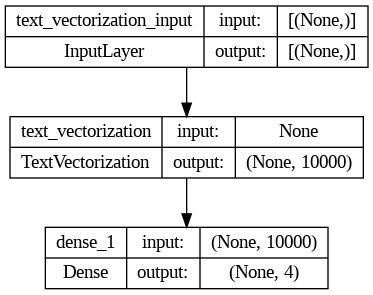

In [23]:
binary_model = tf.keras.Sequential(
    [binary_Vector_layer,
    layers.Dense(4)]
)
binary_model.compile(
    loss = losses.SparseCategoricalCrossentropy(from_logits = True),
    metrics = ['accuracy'],
    optimizer = 'adam'
)
tf.keras.utils.plot_model(binary_model, show_shapes=True)

In [24]:
binary_history = binary_model.fit(raw_train_ds , validation_data = raw_validation_ds , epochs=10)

Epoch 1/10
200/200 [==============================] - 3s 9ms/step - loss: 1.1211 - accuracy: 0.6441 - val_loss: 0.9312 - val_accuracy: 0.7575
Epoch 2/10
200/200 [==============================] - 2s 11ms/step - loss: 0.7783 - accuracy: 0.8261 - val_loss: 0.7662 - val_accuracy: 0.7812
Epoch 3/10
200/200 [==============================] - 1s 7ms/step - loss: 0.6258 - accuracy: 0.8652 - val_loss: 0.6811 - val_accuracy: 0.7931
Epoch 4/10
200/200 [==============================] - 1s 7ms/step - loss: 0.5319 - accuracy: 0.8905 - val_loss: 0.6287 - val_accuracy: 0.7962
Epoch 5/10
200/200 [==============================] - 1s 7ms/step - loss: 0.4657 - accuracy: 0.9087 - val_loss: 0.5934 - val_accuracy: 0.8025
Epoch 6/10
200/200 [==============================] - 1s 7ms/step - loss: 0.4154 - accuracy: 0.9205 - val_loss: 0.5680 - val_accuracy: 0.8087
Epoch 7/10
200/200 [==============================] - 2s 8ms/step - loss: 0.3752 - accuracy: 0.9305 - val_loss: 0.5492 - val_accuracy: 0.8100
Epoch

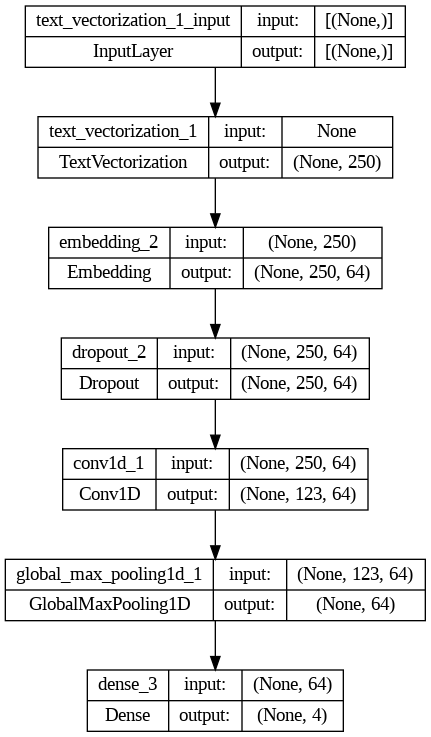

In [28]:
int_model = tf.keras.Sequential([
    int_vector_layer,
    layers.Embedding(10001 , 64 , mask_zero=True),
    layers.Dropout(0.5),
    layers.Conv1D(64,5,padding='valid',activation= "relu",strides=2),
    layers.GlobalMaxPool1D(),
    layers.Dense(4)
])
tf.keras.utils.plot_model(int_model, show_shapes=True)


In [31]:
int_model.compile(
    loss=losses.SparseCategoricalCrossentropy(from_logits = True),
    metrics = ['accuracy'],
    optimizer = 'adam'
)
int_model.fit(raw_train_ds, validation_data = raw_validation_ds,epochs = 10 )

Epoch 1/10
200/200 [==============================] - 10s 44ms/step - loss: 1.2633 - accuracy: 0.4313 - val_loss: 0.9396 - val_accuracy: 0.5975
Epoch 2/10
200/200 [==============================] - 7s 34ms/step - loss: 0.7978 - accuracy: 0.6617 - val_loss: 0.6709 - val_accuracy: 0.7312
Epoch 3/10
200/200 [==============================] - 8s 38ms/step - loss: 0.5817 - accuracy: 0.7798 - val_loss: 0.5820 - val_accuracy: 0.7694
Epoch 4/10
200/200 [==============================] - 10s 50ms/step - loss: 0.4218 - accuracy: 0.8530 - val_loss: 0.5266 - val_accuracy: 0.7912
Epoch 5/10
200/200 [==============================] - 8s 40ms/step - loss: 0.2993 - accuracy: 0.9077 - val_loss: 0.5132 - val_accuracy: 0.8050
Epoch 6/10
200/200 [==============================] - 7s 35ms/step - loss: 0.2085 - accuracy: 0.9422 - val_loss: 0.5297 - val_accuracy: 0.8125
Epoch 7/10
200/200 [==============================] - 8s 42ms/step - loss: 0.1483 - accuracy: 0.9623 - val_loss: 0.5547 - val_accuracy: 0.81

In [32]:
binary_model.predict(['How do you sort a list?'])

1/1 [==============================] - 0s 200ms/step


array([[-0.15403742, -0.0356482 , -0.6429077 ,  0.41181457]],
      dtype=float32)

In [33]:
int_model.predict(['How do you sort a list?'])

1/1 [==============================] - 0s 178ms/step


array([[-0.12690826, -0.1299907 , -0.4892041 ,  0.655295  ]],
      dtype=float32)